<a href="https://colab.research.google.com/github/YasuhiroHasegawa/git-practice/blob/main/elefant_spider.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Google Driveマウント
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/IMGDATASET'
#%cd "/content/drive/MyDrive/images"c

Mounted at /content/drive
/content/drive/MyDrive/IMGDATASET


In [2]:
%cd '/content/drive/'MyDrive/'IMGDATASET'

/content/drive/MyDrive/IMGDATASET


In [3]:
import os

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras import optimizers
from keras.applications.vgg16 import VGG16

In [4]:
classes = ['elefant', 'spider']
base_dir = "case4/"

In [5]:
# 分類クラス
nb_classes = len(classes)
batch_size_for_data_generator = 20


train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cow_dir = os.path.join(train_dir, classes[0])
train_horse_dir = os.path.join(train_dir, classes[1])

validation_cow_dir = os.path.join(validation_dir, classes[0])
validation_horse_dir = os.path.join(validation_dir, classes[1])

test_cow_dir = os.path.join(test_dir, classes[0])
test_horse_dir = os.path.join(test_dir, classes[1])

# 画像サイズ
img_rows, img_cols = 150, 150

In [6]:
print('total training class A images:', len(os.listdir(train_cow_dir)),train_cow_dir)
print('total training class B images:', len(os.listdir(train_horse_dir)),train_horse_dir)

print('total training class A images:', len(os.listdir(validation_cow_dir)),validation_cow_dir)
print('total training class B images:', len(os.listdir(validation_horse_dir)),validation_horse_dir)

print('total test class A images:', len(os.listdir(test_cow_dir)),test_cow_dir)
print('total test class B images:', len(os.listdir(test_horse_dir)),test_horse_dir)

total training class A images: 200 case4/train/elefant
total training class B images: 200 case4/train/spider
total training class A images: 100 case4/validation/elefant
total training class B images: 100 case4/validation/spider
total test class A images: 100 case4/test/elefant
total test class B images: 100 case4/test/spider


In [7]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(img_rows, img_cols),color_mode='rgb',classes=classes,class_mode='categorical',batch_size=batch_size_for_data_generator,shuffle=True)


Found 400 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
    
validation_generator = test_datagen.flow_from_directory(directory=validation_dir,target_size=(img_rows, img_cols),color_mode='rgb',classes=classes,class_mode='categorical',batch_size=batch_size_for_data_generator,shuffle=True)

Found 200 images belonging to 2 classes.


In [9]:
input_tensor = Input(shape=(img_rows, img_cols, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)
vgg16.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [10]:
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(nb_classes, activation='softmax'))
model = Model(inputs=vgg16.input, outputs=top_model(vgg16.output))
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [12]:
vgg16.trainable = True

set_trainable = False
for layer in vgg16.layers:
    #fine tuning の場合　以下のコメントアウト解除
    #if layer.name == 'block5_conv1':
    #    set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [14]:
for layer in model.layers:
    print(layer, layer.trainable )
model.summary()

<keras.engine.input_layer.InputLayer object at 0x7f355e853790> False
<keras.layers.convolutional.Conv2D object at 0x7f355bffbb10> False
<keras.layers.convolutional.Conv2D object at 0x7f355c7aa290> False
<keras.layers.pooling.MaxPooling2D object at 0x7f355c50a5d0> False
<keras.layers.convolutional.Conv2D object at 0x7f355c510dd0> False
<keras.layers.convolutional.Conv2D object at 0x7f355c517410> False
<keras.layers.pooling.MaxPooling2D object at 0x7f355c510ad0> False
<keras.layers.convolutional.Conv2D object at 0x7f355c5205d0> False
<keras.layers.convolutional.Conv2D object at 0x7f355c526c90> False
<keras.layers.convolutional.Conv2D object at 0x7f355c52ee50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f355c520b90> False
<keras.layers.convolutional.Conv2D object at 0x7f355c532f50> False
<keras.layers.convolutional.Conv2D object at 0x7f355c53b5d0> False
<keras.layers.convolutional.Conv2D object at 0x7f355c532bd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f355c4c80d0>

In [15]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-5), metrics=['acc'])

In [16]:
history = model.fit(train_generator,epochs=50,validation_data=validation_generator,validation_steps=10,verbose=1)   

Epoch 1/50
20/20 [==============================] - 347s 15s/step - loss: 0.8254 - acc: 0.5067 - val_loss: 0.5192 - val_acc: 0.8000
Epoch 2/50
20/20 [==============================] - 5s 246ms/step - loss: 0.5692 - acc: 0.7005 - val_loss: 0.4310 - val_acc: 0.8600
Epoch 3/50
20/20 [==============================] - 5s 245ms/step - loss: 0.4980 - acc: 0.7212 - val_loss: 0.3668 - val_acc: 0.9050
Epoch 4/50
20/20 [==============================] - 5s 247ms/step - loss: 0.3561 - acc: 0.8586 - val_loss: 0.3200 - val_acc: 0.9150
Epoch 5/50
20/20 [==============================] - 5s 245ms/step - loss: 0.3522 - acc: 0.8753 - val_loss: 0.2791 - val_acc: 0.9350
Epoch 6/50
20/20 [==============================] - 5s 246ms/step - loss: 0.3291 - acc: 0.8711 - val_loss: 0.2517 - val_acc: 0.9400
Epoch 7/50
20/20 [==============================] - 5s 247ms/step - loss: 0.2559 - acc: 0.9261 - val_loss: 0.2279 - val_acc: 0.9500
Epoch 8/50
20/20 [==============================] - 5s 248ms/step - loss: 0.

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

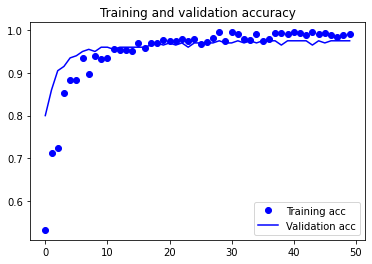

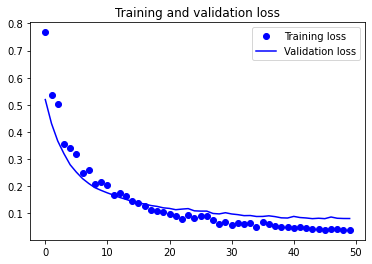

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
test_generator = test_datagen.flow_from_directory(directory=test_dir,target_size=(img_rows, img_cols),color_mode='rgb',classes=classes,class_mode='categorical',batch_size=batch_size_for_data_generator)

test_loss, test_acc = model.evaluate(test_generator,batch_size=50)
print('test acc:', test_acc)

Found 200 images belonging to 2 classes.
10/10 [==============================] - 91s 10s/step - loss: 0.0843 - acc: 0.9600
test acc: 0.9599999785423279
